# Hypothesis Testing

# Agenda

1. Establish the basic framework and vocabulary for hypothesis testing
2. Define Null and Alternative Hypothesis
3. Define p-value, alpha, Type 1 and Type 2 Errors
4. Define and perform Z-tests
5. Define and perform T-tests: 1 sample and 2 sample

In [1]:
from src.student_caller import three_random_students, one_random_student
from src.student_list import student_first_names
import numpy as np


# Let's begin with code, work through a computational version of hypothesis testing

Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 40 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

In [2]:

np.random.seed(42)
# Let's simulate a sample, using numpy's random.normal function:

## Refresher on CLT

<img src="./img/sampling-dist.jpg" width="500" class="center">
Remember the CLT states that as a sample size $n$ increases, the sampling distribution of of the mean from a random sample size of $n$ more closely approximates a normal distribution.  

<img src="./img/Normal-Distribution.png" width="500" class="center">


In [5]:
# So let's take the means of 1000 samples and store them in a list

np.random.normal(9000, 900, 1000).mean()

9063.75261352424

In [21]:
# Now plot the sampling distribution
sampling = []
for _ in range(1000):
    samp = np.random.normal(9000, 900, 40).mean()
    sampling.append(samp)

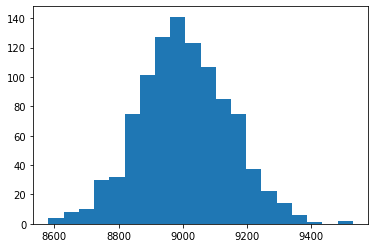

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(sampling, bins=20);

In [23]:
# Now, let's count the number of times the randomly samples' means has a value less than or equal to the mean of our Gabonese sample.
count = 0
for samp in sampling:
    print(samp)
    if samp < 8637:
        count+=1

8734.966285582697
8746.740032940841
8976.75731547417
9192.010757640923
9150.80215349895
9116.023003515264
8978.526326801088
8865.920512568355
9140.260472680278
8904.553713189409
9055.069532826768
8943.221690973742
9261.213344682143
8864.660106779475
8995.617316542304
8899.331460332274
8820.854294597662
8997.800052131108
9065.816143034632
9040.924777139398
9172.705567233157
9034.796491861469
9045.062918841777
9098.920553561878
9058.219462538415
8821.68333055918
9236.571399967326
8952.622665129868
9041.077228580818
9023.112055243933
8842.960402840597
8926.800374317856
8726.047296721485
9181.208050066914
9180.215373560914
9122.193130497477
9022.295816581154
8744.064119598019
8965.901739685938
9022.034537162874
9254.768023591927
8983.33961758253
9161.68801425061
9122.109022927432
9162.878084846127
8970.554721055354
9159.441700547284
8886.835690135962
9106.089640021648
8939.900777841362
8903.035405158456
8829.63626802899
9037.043968087799
9050.013594676999
8908.574075306044
8867.09992896354

In [25]:
# The probability of finding a value less than or equal to our sample statistic is:
count/len(sampling)

0.005

In [ ]:
# Let's make sure this intuition aligns with the z-score

Now let's calculate the z-score analytically.
Remember the formula for z-score:  


$z = \large\dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$

In [28]:
z_score = (8637 - 9000)/(900/np.sqrt(40))

In [29]:
# convert that z-score to a probability


In [30]:
from scipy import stats
stats.norm.cdf(z_score)

0.005372196151815369

# Now let's add the vocabulary and framework to create fullfledged hypothesis tests

## Scenario

The Donut Fairy is a new gourmet donut shop. They want to increase sales at their store so they decide to give out some coupons.  They give forty of their customers a 3 dollar off coupon. On average, with no coupon, a Donut Fairy customer spends 12 dollars a visit, with a standard deviation of 3.5 dollars. They find that the 40 customers they gave a coupon spend on average 17 dollars with a standard deviation of 4. They would like to know whether this increased expenditure is a result of offering the coupon rather than chance occurrence.


# 1: Establish the basic framework and assumptions for hypothesis testing

### High Level Hypothesis Testing
1. Start with a Scientific Question (yes/no)

2. Take the skeptical stance (Null hypothesis) 

3. State the complement (Alternative)

4. Create a model of the situation Assuming the Null Hypothesis is True!

5. Decide how surprised you would need to be in order to change your mind

### Hypothesis Testing Steps

1. Set up null and alternative hypotheses

2. Specify the appropriate statistical test

3. Choose a significance level (alpha)

4. Determine the critical value of test statistic

5. Calculate the observed value of the test statistic and the p-value.

6. Make a decision (reject or fail to reject) regarding the Null Hypothesis by comparing the observed value of the test-statistic with critical value.

### 1: Setup Null and Alternative Hypotheses


### The Null Hypothesis

![gmonk](https://vignette.wikia.nocookie.net/villains/images/2/2f/Ogmork.jpg/revision/latest?cb=20120217040244) There is NOTHING, **no** difference.
![the nothing](https://vignette.wikia.nocookie.net/theneverendingstory/images/a/a0/Bern-foster-the-neverending-story-clouds.jpg/revision/latest?cb=20160608083230)

### The Alternative hypothesis

![difference](./img/giphy.gif)

If we're testing the function of a new drug, then the null hypothesis will say that the drug has _no effect_ on patients, or anyway no effect relative to relief of the malady the drug was designed to combat. 

If we're testing whether Peeps cause dementia, then the null hypothesis will say that there is _no correlation_ between Peeps consumption and rate of dementia development.

![peeps](https://media.giphy.com/media/j3kh0AAZfeNP2/giphy.gif)

![](./img/summary_one_two.jpg)

## Practice: Write the hypotheses

<img src="img/talking.jpeg" width="60" align='left'>

</br>

With a classmate Slack out the null and alternative hypotheses for The Donut Fairy example in your own words.

In [ ]:
Customers given coupons spent the same amount as customers that were not given the coupon
Customers given the coupon spent more than customers 

### Step 2: Specify the type of test 

### How do we know whether we need to use a z-test or a t-test? 

<img src="img/z_or_t_test.png" width="500">

In [ ]:
# What type of test should we use

## Step 3: Choosing a significance level

### How Unlikely Is Too Unlikely?

### $Alpha: \alpha$

In order to test our hypothesis we will need a way to decide if we should reject the null hypothesis.  The way we do this is by setting the $\alpha$ value, otherwise known as the significance level before we conduct our analysis.  The $\alpha$ value is the probability of rejecting the null hypothesis when it is true.  For example an $\alpha$ value of 0.05 indicates that there is a 5% risk of rejecting the null hypothesis when it fact it is true.  

Note:  We can chance our alpha value based on how important it is to be accurate in our decision making. It is common to have alpha values of .10, .05, or .01 but you can set any value.

<img src="./img/alpha_regions.jpg" width=800  class="center">

### Since it is a common alpha level and we don't have a particularly risky decision to make we will use an alpha level of 0.05.

## Step 4: Determine the critical value of test statistic

For our donut example, we have to find the zscore associated with an $\alpha$ of .05

To do so, we can use stats.norm.ppf(), or a z-table.

In [31]:
# code here

stats.norm.ppf(.95)

1.6448536269514722

# Step 5: Calculating the observed test value and our p-value

The basic idea of a p-value is the probability the you would obtain this value in your sample, or larger, if the null hypothesis is true of the population. 

<img src="./img/one_tailed.png" width=800  class="center">


# Let's calculate our observed zscore


$z = \large\dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$


In [34]:
# Code

z = (17-13.5)/(3.5/np.sqrt(40))
z

6.324555320336759

In [36]:
# Now calculate p-value using stats.norm.cdf()
1-stats.norm.cdf(z)

1.269814253745949e-10

# Step 6: Making A Decision!


Once we have our observed test value we can compare it to our alpha value to make a decision regarding our hypothesis.  In step 4 we determined that the critical z-statistic was $\pm$ 1.645 and our critical p-value was 0.05.  Our observed t-statistic was 6.32 and observed p-value of 1.269814253745949e-10 are more extreme than the critical values, falling in the region of rejection.  Thus we are able to reject the null hypothesis that the sales did not differ depending on the type of coupon the customers received.


<img src="./img/pval_1.jpg" width=500  class="center"> <img src="./img/pval_2.jpg" width=500  class="center">


If $p$ observed $\lt \alpha$, we reject the null hypothesis.:

If $p$ observed $\geq \alpha$, we fail to reject the null hypothesis.

> **We do not accept the alternative hypothesis, we only reject or fail to reject the null hypothesis in favor of the alternative.**

* We do not throw out failed experiments! 
* We say "this methodology, with this data, does not produce significant results" 
    * Maybe we need more data!


## Type 1 Errors (False Positives) and Type 2 Errors (False Negatives)
Most tests for the presence of some factor are imperfect. And in fact most tests are imperfect in two ways: They will sometimes fail to predict the presence of that factor when it is after all present, and they will sometimes predict the presence of that factor when in fact it is not. Clearly, the lower these error rates are, the better, but it is not uncommon for these rates to be between 1% and 5%, and sometimes they are even higher than that. (Of course, if they're higher than 50%, then we're better off just flipping a coin to run our test!)

Predicting the presence of some factor (i.e. counter to the null hypothesis) when in fact it is not there (i.e. the null hypothesis is true) is called a "false positive". Failing to predict the presence of some factor (i.e. in accord with the null hypothesis) when in fact it is there (i.e. the null hypothesis is false) is called a "false negative".

![](./img/decisions.jpg)


![](./img/Type1_type2_errors.jpg)

#### Turn and Talk
<img src="img/talking.jpeg" width="60" align='left'>
</br>
</br>
</br>

1. In context of our ad scenario what are the type 1 and type 2 errors?
2. How does changing our alpha value change the rate of type 1 and type 2 errors?

# T-tests

According to the **Central Limit Theorem**, the sampling distribution of a statistic, like the sample mean, will follow a normal distribution _as long as the sample size is sufficiently large_. 

__What if we don't have large sample sizes?__

When we do not know the population standard deviation or we have a small sample size, the sampling distribution of the sample statistic will follow a t-distribution.  
* Smaller sample sizes have larger variance, and t-distributions account for that by having heavier tails than the normal distribution.
* t-distributions are parameterized by degrees of freedom, fewer degrees of freedom fatter tails. Also converges to a normal distribution as df >> 0

<img src="./img/distributions1.png" width=600  class="center">


Let's reimagine the Donut Fairy scenario above.  Now, instead of 40 people, the Donut Fairy owner only gives out $10 coupons to 20 people.


The Donut Fairy is a new gourmet donut shop. They want to increase sales at their store so they decide to give out some coupons.  They give **20** of their customers a 3 dollar off coupon. On average, with no coupon, a Donut Fairy customer spends 12 dollars a visit, with a standard deviation of 3.5 dollars. They find that the **20** customers they gave a coupon spend on average 17 dollars. They would like to know whether this increased expenditure is a result of offering the coupon rather than chance occurrence.


# Steps 

1. Set up null and alternative hypotheses

2. Specify the appropriate statistical test

3. Choose a significance level (alpha)

4. Determine the critical value of test statistic

5. Calculate the observed value of the test statistic and the p-value.

6. Make a decision (reject or fail to reject) regarding the Null Hypothesis by comparing the observed value of the test-statistic with critical value.

In [ ]:
#1 


In [ ]:
#2

In [ ]:
#3

In [38]:
# 4 Determine the t-critical value using stats.t.ppf()
stats.t.ppf(.95, df=19)


1.729132811521367

In [39]:
#5 Determine the sample test statistic and corresponding pvalue

(17-13.5)/(4/np.sqrt(20))

3.913118960624632



* For small sample sizes or samples with unknown population standard deviation, the test statistic of the sample mean is given by the **t-statistic**, 
$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} $$ Here, $s$ is the sample standard deviation, which is used to estimate the population standard deviation, and $\mu$ is the population mean.  

* Our hypothesis test tries to answer the question of how likely we are to observe a t-statistic as extreme as our sample's given the null hypothesis that the sample and population have the same mean, given a significance threshold of $\alpha$. This is a one-sample t-test.

In [ ]:
t = (17-13.5)/

In [ ]:
#6 Make a decision (reject or fail to reject) regarding the Null Hypothesis by comparing the observed value of the test-statistic with critical value.

In [ ]:
# Your code here

Most often, you will have access to the values of the sample.  If you have access to those values, we can feed them into the stats ttest_1samp function 

Consider the following array associated with the purchases of the 20 Donut Fairy customers given 3 dollar coupons.

In [41]:
coupon_purchase_amount = [11, 17, 15, 19, 15, 17, 17, 10, 18, 13, 11, 12, 16, 18, 16, 10, 15, 15, 14, 10]

In [42]:
# Pass array into stats.ttest() along with the known population mean

In [43]:
stats.ttest_1samp(coupon_purchase_amount, 13.5)

Ttest_1sampResult(statistic=1.4507354421483072, pvalue=0.16316347113146382)

In [44]:
# check
test_stat = (np.mean(coupon_purchase_amount) - 13.5)/(np.std(coupon_purchase_amount, ddof=1)/np.sqrt(len(coupon_purchase_amount)))
test_stat

1.4507354421483072



## Two-sample t-tests 

Sometimes, we are interested in determining whether two population means are equal. In this case, we use two-sample t-tests.

There are two types of two-sample t-tests: **paired** and **independent** (unpaired) tests. 

What's the difference?  

**Paired tests**: How is a sample affected by a certain treatment? The individuals in the sample remain the same and you compare how they change after treatment. 

**Independent tests**: When we compare two different, unrelated samples to each other, we use an independent (or unpaired) two-sample t-test.

## Scenario

The Donut Fairy is a new gourmet donut shop. They want to increase sales at their store so they decide to give out some coupons.  They give twenty of their customers a 50% off coupon and an additional 20 people a 10 dollars off coupon.  After a month The Donut Fairy had gathered the following data regarding the purchase ammounts corresponding to the two coupons. 

```
# ad1 - 50% off coupon
ad_1=[22, 16, 26, 29, 14, 10, 23, 20, 17, 19, 27, 22, 15, 21, 24, 9, 29, 22, 19, 16]

#ad2 - 10 dollars off coupon
ad_2=[12, 14, 11, 22, 13, 17, 15, 20, 15, 13, 15, 14, 12, 14, 15, 16, 17, 14, 21, 10]
```

The Donut Fairy is now wondering how sure they can be that the difference between the average sales were a result of difference in coupon types rather than chance occurrence.


<img src="./img/coupon1.png" width="300"> <img src="./img/coupon2.png" width="300"> 

# Round Robin


In [ ]:
one_random_student(student_first_names)

# Steps 

1. Set up null and alternative hypotheses

In [ ]:
# Your answer here

2. Specify the appropriate statistical test


In [ ]:
# Your answer

3. Choose a significance level (alpha)

In [ ]:
# Your answer here

4. Determine the critical value of test statistic
5. Calculate the observed value of the test statistic and the p-value.

In [ ]:

# ad1 - 50% off coupon
ad_1=[22, 16, 26, 29, 14, 10, 23, 20, 17, 19, 27, 22, 15, 21, 24, 9, 29, 22, 19, 16]

#ad2 - 10 dollars off coupon
ad_2=[12, 14, 11, 22, 13, 17, 15, 20, 15, 13, 15, 14, 12, 14, 15, 16, 17, 14, 21, 10]
result = stats.ttest_ind(ad_1, ad_2, equal_var=False)

result

6. Make a decision (reject or fail to reject) regarding the Null Hypothesis by comparing the observed value of the test-statistic with critical value.

In [ ]:
# Your code here

Can we reject?

# Summary 

Key Takeaways:

* A statistical hypothesis test is a method for testing a hypothesis about a parameter in a population using data measured in a sample. 
* Hypothesis tests consist of a null hypothesis and an alternative hypothesis.
* We test a hypothesis by determining the chance of obtaining a sample statistic if the null hypothesis regarding the population parameter is true. 
* One-sample z-tests and one-sample t-tests are hypothesis tests for the population mean $\mu$. 
* We use a one-sample z-test for the population mean when the population standard deviation is known and the sample size is sufficiently large. We use a one-sample t-test for the population mean when the population standard deviation is unknown or when the sample size is small. 
* Two-sample t-tests are hypothesis tests for differences in two population means. 